# Processamento de Imagens - Impressões Digitais

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1w_gU54EVl2F7pbjQTrTpx1rcevJWND9C?usp=drive_link)

### Imports

In [98]:
# Biblioteca para processamento de imagens
!pip install pillow

In [68]:
from PIL import Image # Manipulação de imagens
import cv2 # Processamento de imagem avançado
import requests # Fazer requisições HTTP
import numpy as np # Manipulação de arrays numéricos
from io import BytesIO # trabalhar com dados binários em memória
from matplotlib import pyplot as plt # visualização de imagens e gráficos

### Funções auxiliares

In [69]:
# Converte uma imagem do formato OpenCV (numpy array) para formato Pillow (Image)
def convert_from_cv2_to_image(img: np.ndarray) -> Image:
    return Image.fromarray(img) # converte um array numpy em um objeto Image do Pillow

# Converte uma imagem do formato Pillow (Image) para formato OpenCV (numpy array)
def convert_from_image_to_cv2(img: Image) -> np.ndarray:
    return np.asarray(img) # converte um objeto Image em um array numpy

# Baixa uma imagem da internet a partir de uma URL
def img_from_url(url: str) -> Image.Image:
   # Faz uma requisição GET para a URL especificada
    response = requests.get(url, stream=True)
    response.raise_for_status()
    # Converte o conteúdo da resposta em uma imagem Pillow
    return Image.open(BytesIO(response.content)).convert("RGB") # Garante que esteja no formato RGB

# Função para exibir duas imagens lado a lado
def plot_side_by_side(img1, img2, title1="Original", title2="Processada", figsize=(12, 6)):
    # Cria uma nova figura com tamanho personalizado
    plt.figure(figsize=figsize)

    # Primeira imagem (esquerda)
    plt.subplot(1, 2, 1)

    # Verifica o tipo da imagem para exibir corretamente
    if isinstance(img1, Image.Image):  # Se for uma imagem Pillow
        plt.imshow(img1, cmap='gray' if img1.mode == 'L' else None)
    elif len(img1.shape) == 2:  # Se for uma imagem em tons de cinza (2D)
        plt.imshow(img1, cmap='gray')
    else:  # Se for uma imagem colorida (3D)
        plt.imshow(img1)

    plt.title(title1)  # Título da imagem
    plt.axis('off')   # Remove os eixos

    # Segunda imagem (direita)
    plt.subplot(1, 2, 2)
    if isinstance(img2, Image.Image):
        plt.imshow(img2, cmap='gray' if img2.mode == 'L' else None)
    elif len(img2.shape) == 2:
        plt.imshow(img2, cmap='gray')
    else:
        plt.imshow(img2)
    plt.title(title2)
    plt.axis('off')

    # Ajusta para evitar sobreposição
    plt.tight_layout()
    # Exibe a figura
    plt.show()

### URL da imagem que será processada (imagem de impressões digitais)

In [ ]:
url = 'https://3.bp.blogspot.com/-fHQCJbMVkwI/WLQ9OzvtyjI/AAAAAAAACeY/njgdopcUG8s6RWm1wjwcrFxyiiL7nLRawCLcB/s1600/huellas-digitales.jpg'

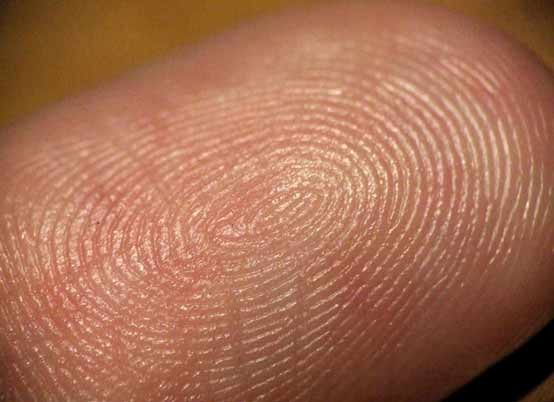

In [70]:
# Baixa a imagem da URL usando a função auxiliar
Original = img_from_url(url)
Original

### Detecção de bordas

In [99]:
# Converte a imagem Pillow para formato OpenCV
open_cv_image = convert_from_image_to_cv2(Original)

In [100]:
# Converte a imagem colorida para tons de cinza
# cv2.cvtColor() converte entre espaços de cor
# COLOR_BGR2GRAY converte de BGR (formato OpenCV) para tons de cinza
img_cinza = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)

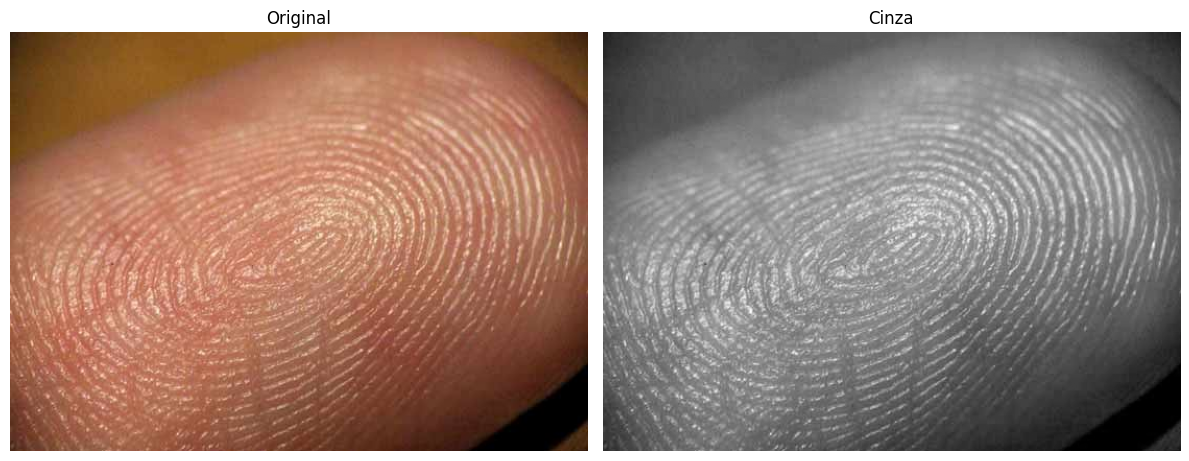

In [73]:
# Exibe a imagem original e a versão em tons de cinza lado a lado
plot_side_by_side(Original, img_cinza ,title1="Original",title2="Cinza")

In [74]:
# Aplica um filtro Gaussiano para suavizar a imagem
# cv2.GaussianBlur() reduz ruído e detalhes finos
# (9, 9): tamanho do kernel (matriz de filtro) - deve ser ímpar
# 0: desvio padrão (0 significa calcular automaticamente)
img_suavizada = cv2.GaussianBlur(img_cinza, (9, 9), 0)

In [75]:
# Detecta bordas usando o algoritmo Canny
# cv2.Canny() é um detector de bordas multi-estágio
# 10: limiar inferior para detecção de bordas
# 60: limiar superior para detecção de bordas
img_bordas = cv2.Canny(img_suavizada, 10, 60 )

In [76]:
# Converte a imagem de bordas (tons de cinza) para RGB para visualização colorida
img_bordas_RGB = cv2.cvtColor(img_bordas, cv2.COLOR_GRAY2RGB)

In [77]:
# Converte de volta para formato Pillow
img_bordas_RGB = convert_from_cv2_to_image(img_bordas_RGB)

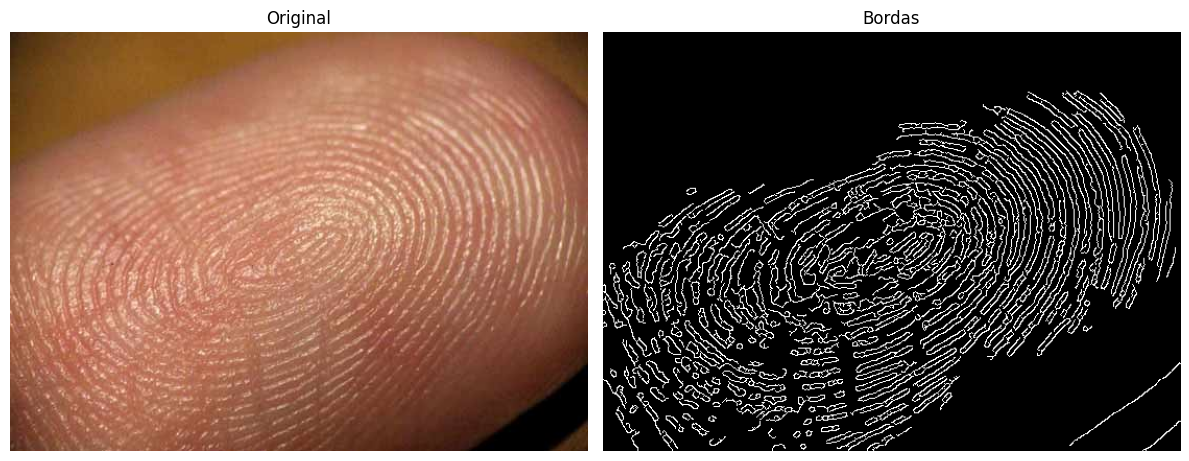

In [78]:
# Exibe a imagem original e as bordas detectadas lado a lado
plot_side_by_side(Original, img_bordas_RGB ,title1="Original",title2="Bordas")

### Binarização



In [79]:
# Aplica binarização usando o método de Otsu
# cv2.threshold() converte uma imagem em tons de cinza para preto e branco
# 0: valor do limiar (ignorado quando usando THRESH_OTSU)
# 255: valor máximo (pixels acima do limiar ficam brancos)
# THRESH_BINARY + THRESH_OTSU: método de binarização automática de Otsu
limiar, binarizada = cv2.threshold(img_cinza, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [80]:
# Converte a imagem binarizada (tons de cinza) para RGB para visualização
imagem_binarizada = cv2.cvtColor(binarizada, cv2.COLOR_GRAY2RGB)

In [81]:
# Converte para formato Pillow
imagem_binarizada = convert_from_cv2_to_image(imagem_binarizada)

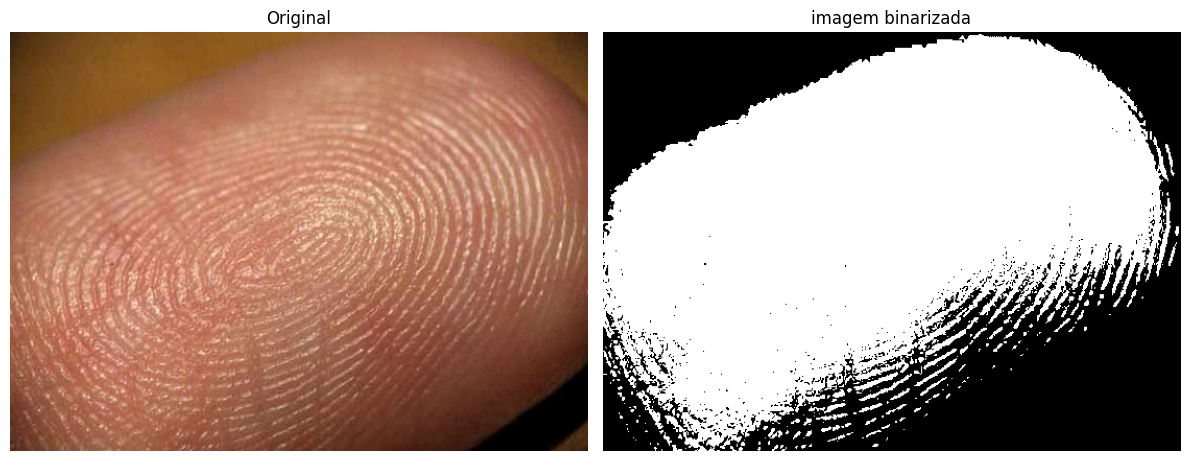

In [82]:
# Exibe a imagem original e a versão binarizada lado a lado
plot_side_by_side(Original, imagem_binarizada ,title1="Original",title2="imagem binarizada")

### Histograma


In [83]:
# Aplica equalização de histograma para melhorar o contraste
# cv2.equalizeHist() redistribui os valores de intensidade
img_Histograma = cv2.equalizeHist(img_cinza)

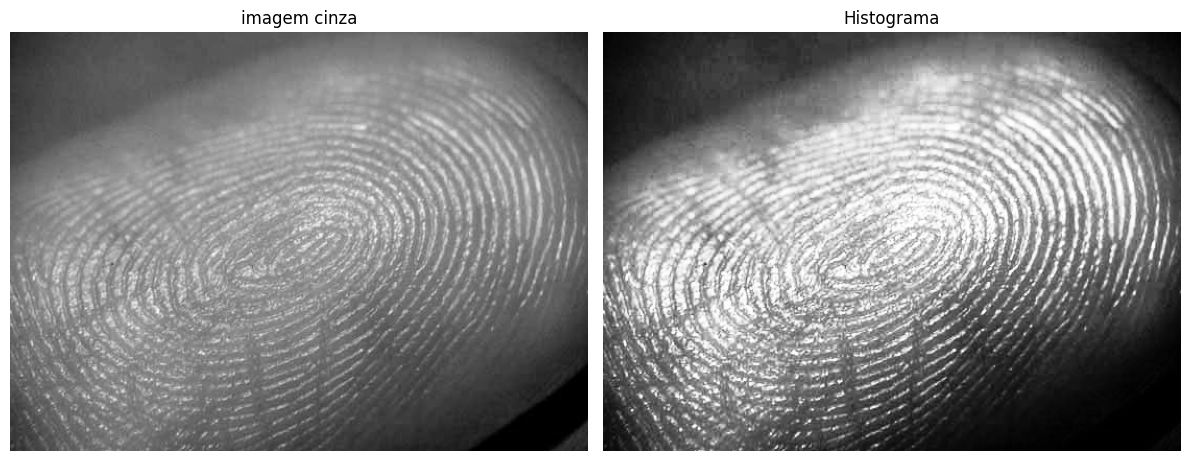

In [84]:
# Exibe a imagem em tons de cinza e a equalizada lado a lado
plot_side_by_side(img_cinza, img_Histograma, title1='imagem cinza', title2='Histograma')

/tmp/ipython-input-253532952.py:4: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_cinza.flatten(), 256, [0, 256])
/tmp/ipython-input-253532952.py:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_Histograma.flatten(), 256, [0, 256])


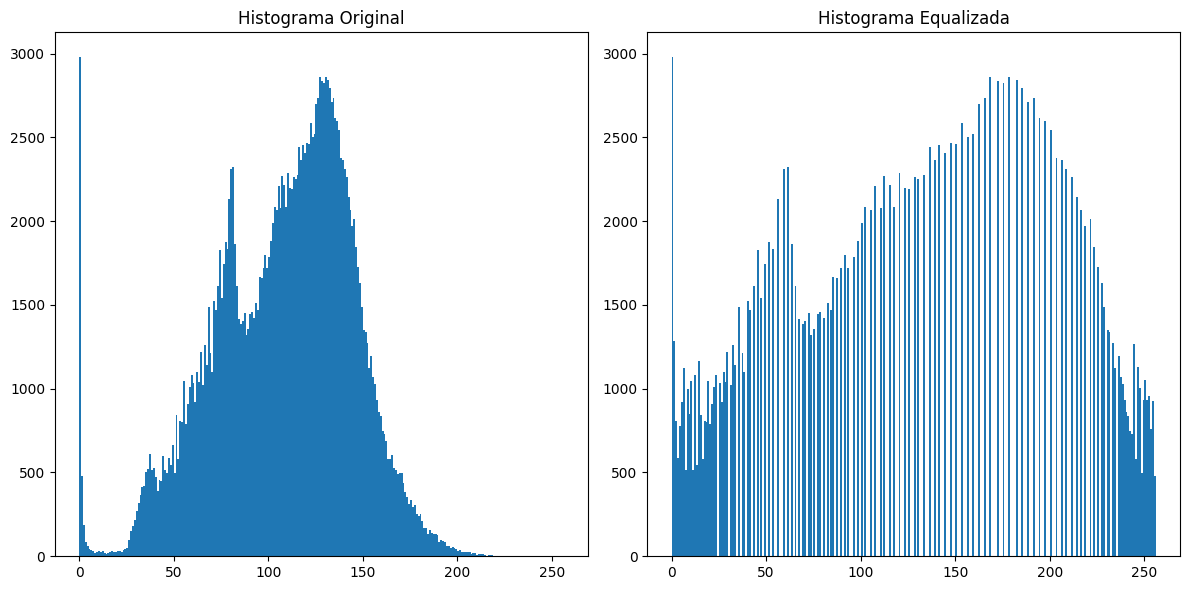

In [85]:
# Cria uma figura com dois subplots para comparar histogramas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(img_cinza.flatten(), 256, [0, 256])
plt.title('Histograma Original')

plt.subplot(1, 2, 2)
plt.hist(img_Histograma.flatten(), 256, [0, 256])
plt.title('Histograma Equalizada')

plt.tight_layout()
plt.show()


### Normalização e equalização:


In [86]:
# Normaliza a imagem para usar toda a faixa de intensidade (0-255)
# cv2.normalize() ajusta os valores dos pixels
# None: máscara (não usada)
# 0, 255: faixa de saída mínima e máxima
# cv2.NORM_MINMAX: método de normalização
normalizada = cv2.normalize(img_cinza, None, 0, 255, cv2.NORM_MINMAX)

In [87]:
# Converte a imagem normalizada para RGB para visualização
imagem_normalizada = cv2.cvtColor(normalizada, cv2.COLOR_GRAY2RGB)

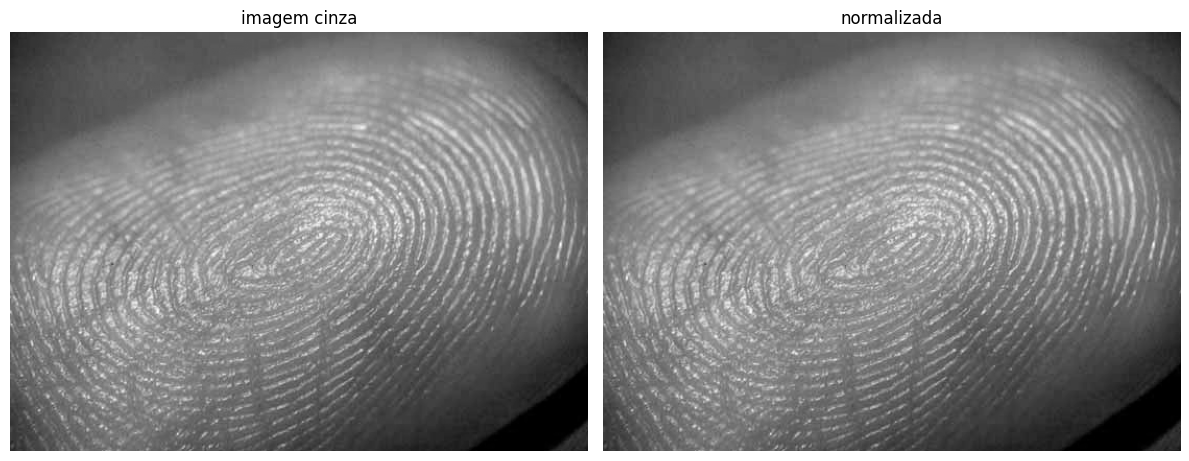

In [88]:
# Exibe a imagem original em tons de cinza e a normalizada
plot_side_by_side(img_cinza, imagem_normalizada, title1='imagem cinza', title2='normalizada')

In [89]:
# Calcula o histograma da imagem normalizada
# cv2.calcHist() calcula o histograma de uma imagem
# [imagem_normalizada]: lista de imagens (pode ser mais de uma)
# [0]: índice do canal (0 para tons de cinza)
# None: máscara (nenhuma)
# [256]: número de bins
# [0, 256]: faixa de valores
histograma_normalizado = cv2.calcHist([imagem_normalizada], [0], None, [256], [0, 256])

/tmp/ipython-input-2864291951.py:4: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_cinza.flatten(), 256, [0, 256])


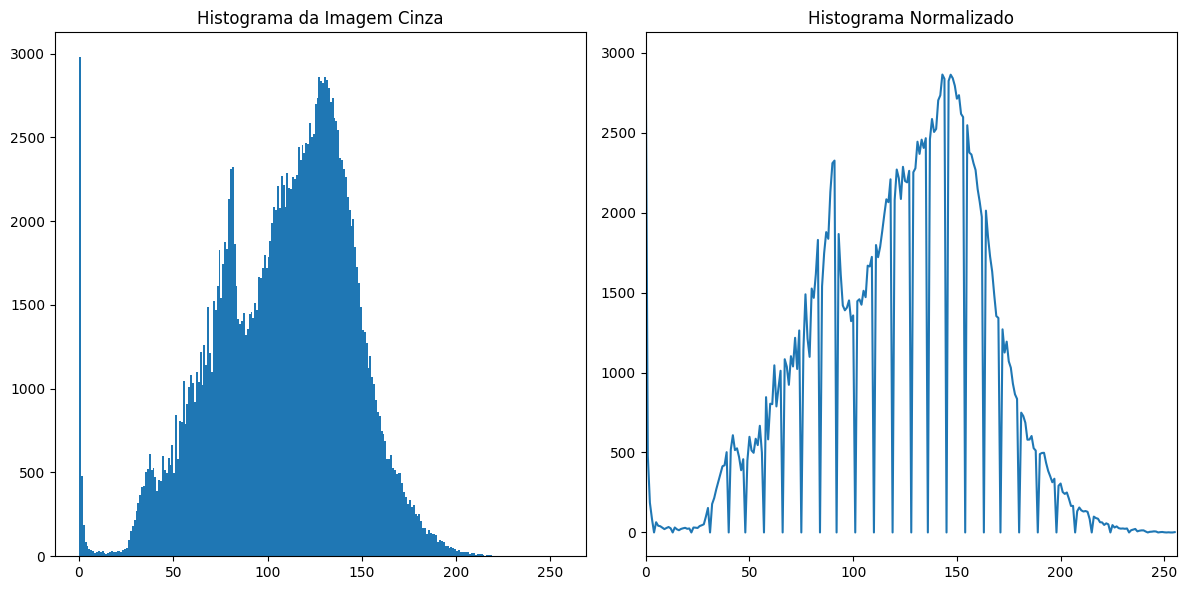

In [90]:
# Cria uma figura para comparar histogramas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(img_cinza.flatten(), 256, [0, 256])
plt.title('Histograma da Imagem Cinza')


plt.subplot(1, 2, 2)
plt.plot(histograma_normalizado)
plt.title('Histograma Normalizado')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

In [91]:
# Aplica equalização de histograma na imagem normalizada
Equalizacao = cv2.equalizeHist(normalizada)

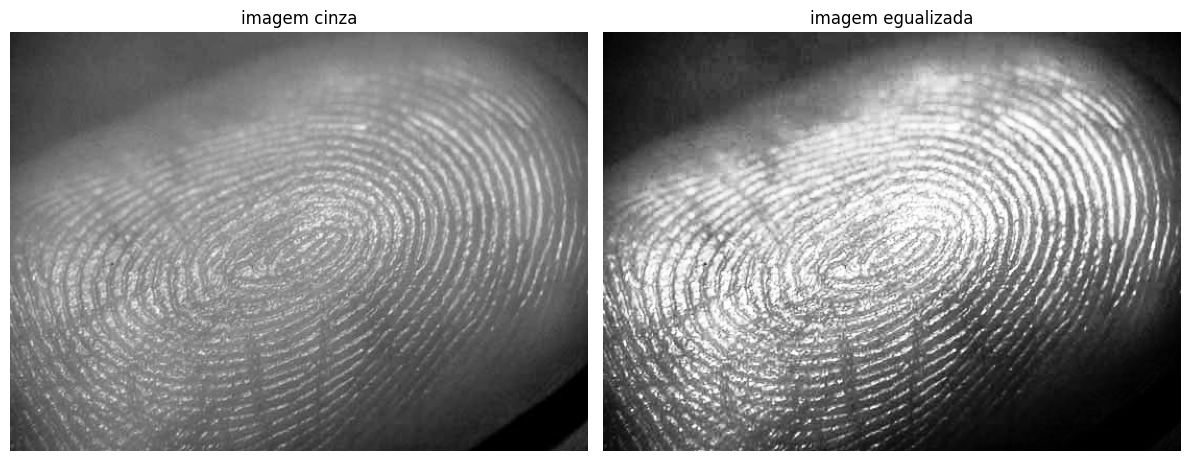

In [92]:
# Exibe a imagem original e a equalizada
plot_side_by_side(img_cinza, Equalizacao, title1='imagem cinza', title2='imagem egualizada')

In [93]:
# Calcula o histograma da imagem equalizada
histograma_equalizado = cv2.calcHist([Equalizacao], [0], None, [256], [0, 256])

/tmp/ipython-input-3555336482.py:4: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_cinza.flatten(), 256, [0, 256])


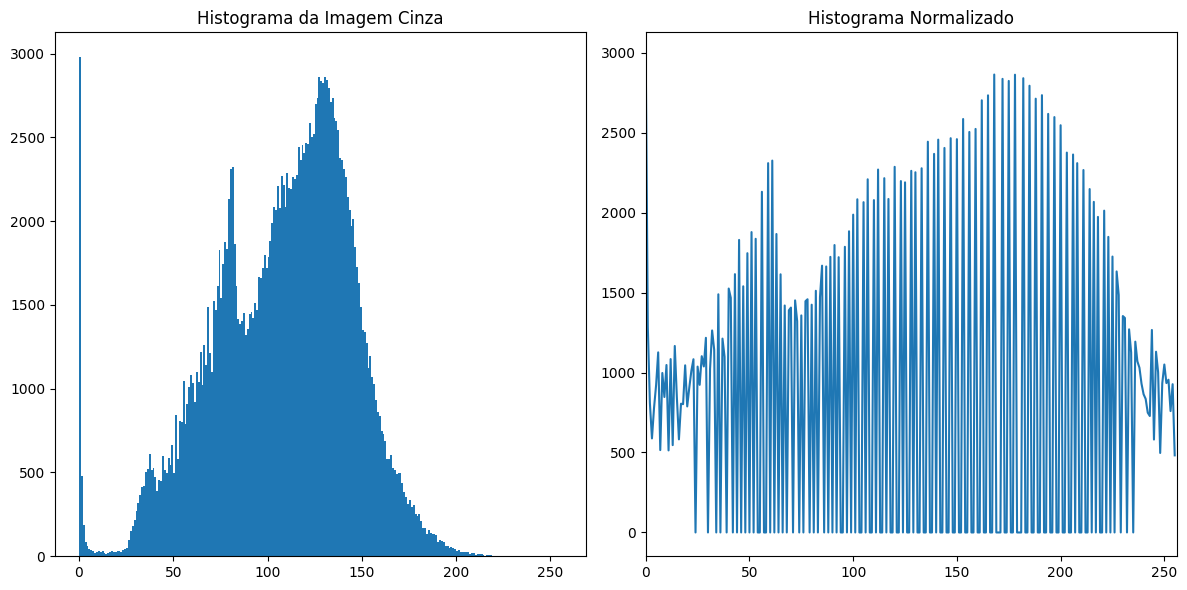

In [94]:
# Cria uma figura para comparar histogramas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(img_cinza.flatten(), 256, [0, 256])
plt.title('Histograma da Imagem Cinza')


plt.subplot(1, 2, 2)
plt.plot(histograma_equalizado)
plt.title('Histograma Normalizado')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

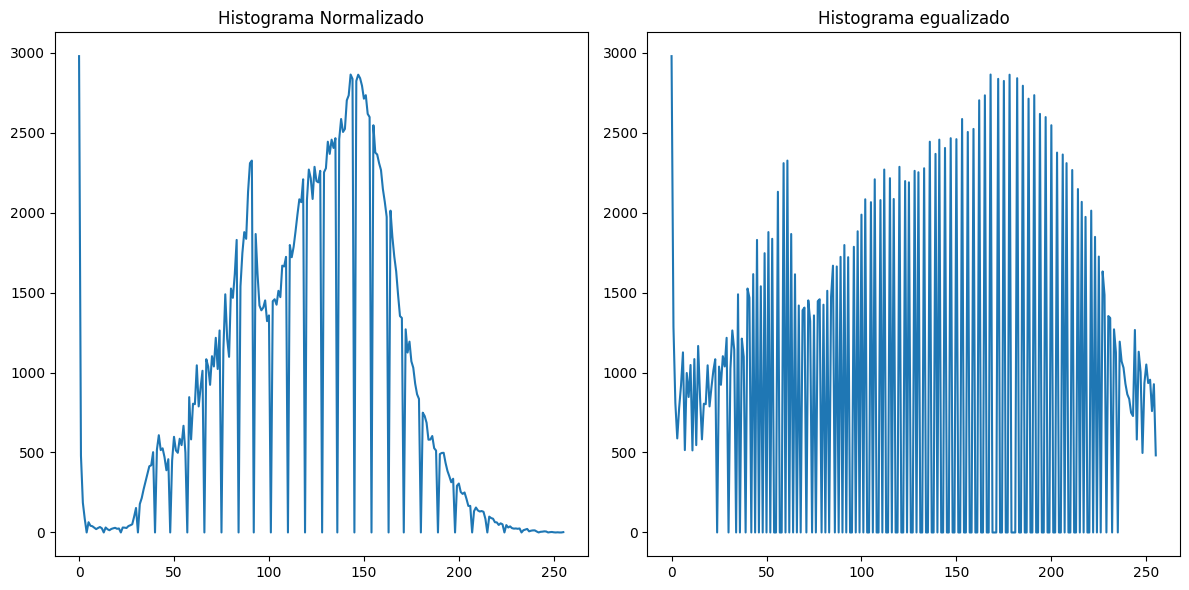

In [97]:
# Cria uma figura para comparar histogramas normalizado vs equalizado
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_normalizado)
plt.title('Histograma Normalizado')

plt.subplot(1, 2, 2)
plt.plot(histograma_equalizado)
plt.title('Histograma egualizado')


plt.tight_layout()
plt.show()

In [101]:
print("""
esse codigo demonstra a VISÃO COMPUTACIONAL utilizando várias técnicas
de processamento de imagens usando OpenCV e Pillow.

ETAPAS PRINCIPAIS:

1. CONFIGURAÇÃO E CARREGAMENTO:
   - Instala e importa bibliotecas necessárias
   - Define funções auxiliares para conversão entre formatos
   - Baixa uma imagem de impressões digitais da internet

2. PRÉ-PROCESSAMENTO:
   - Conversão para tons de cinza (reduz complexidade)
   - Suavização com filtro Gaussiano (remove ruído)

3. TÉCNICAS DE PROCESSAMENTO:
   a) DETECÇÃO DE BORDAS (Canny):
      - Identifica transições bruscas de intensidade
      - Útil para segmentação e reconhecimento de padrões

   b) BINARIZAÇÃO (Otsu):
      - Converte imagem em preto e branco
      - Método automático que encontra o melhor limiar

   c) MANIPULAÇÃO DE HISTOGRAMA:
      - Normalização: ajusta faixa de intensidade
      - Equalização: melhora contraste redistribuindo intensidades
      - Visualização: compara distribuições de pixels

CONCEITOS IMPORTANTES:
- Histograma: gráfico que mostra a distribuição dos valores de intensidade dos pixels
- Normalização: ajusta os valores para uma faixa específica (0-255)
- Equalização: redistribui os valores para melhorar o contraste
- Binarização: converte imagem em preto e branco (2 valores)
- Detecção de bordas: identifica fronteiras entre regiões
""")


esse codigo demonstra a VISÃO COMPUTACIONAL utilizando várias técnicas
de processamento de imagens usando OpenCV e Pillow.

ETAPAS PRINCIPAIS:

1. CONFIGURAÇÃO E CARREGAMENTO:
   - Instala e importa bibliotecas necessárias
   - Define funções auxiliares para conversão entre formatos
   - Baixa uma imagem de impressões digitais da internet

2. PRÉ-PROCESSAMENTO:
   - Conversão para tons de cinza (reduz complexidade)
   - Suavização com filtro Gaussiano (remove ruído)

3. TÉCNICAS DE PROCESSAMENTO:
   a) DETECÇÃO DE BORDAS (Canny):
      - Identifica transições bruscas de intensidade
      - Útil para segmentação e reconhecimento de padrões
   
   b) BINARIZAÇÃO (Otsu):
      - Converte imagem em preto e branco
      - Método automático que encontra o melhor limiar
   
   c) MANIPULAÇÃO DE HISTOGRAMA:
      - Normalização: ajusta faixa de intensidade
      - Equalização: melhora contraste redistribuindo intensidades
      - Visualização: compara distribuições de pixels

CONCEITOS IMPORT